# Challenge

# Mission 1: Create an AI Model


## Setup the Environment

The following peace of code, sets up the environment.**

In [1]:
import warnings
warnings.filterwarnings("ignore")

!pip install statsmodels==0.12.2


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from learntools.time_series.utils import plot_periodogram
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

import pickle

print("Setup Complete")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 42.1 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.2
    Uninstalling statsmodels-0.13.2:
      Successfully uninstalled statsmodels-0.13.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.19.0 requires statsmodels>=0.13, but you have statsmodels 0.12.2 which is incompatible.
Setup Complete


## Load the data

The dataset is “Monatszahlen Verkehrsunfälle” Dataset from the [München Open Data Portal](https://www.opengov-muenchen.de/dataset/monatszahlen-verkehrsunfaelle/resource/40094bd6-f82d-4979-949b-26c8dc00b9a7).


In [2]:
# Import and inspect the data
mun_filepath = "https://opendata.muenchen.de/dataset/5e73a82b-7cfb-40cc-9b30-45fe5a3fa24e/resource/40094bd6-f82d-4979-949b-26c8dc00b9a7/download/220511_monatszahlenmonatszahlen2204_verkehrsunfaelle.csv"

mun_df = pd.read_csv(mun_filepath)
mun_df.head(12)

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2022,202201,NaN,16.0,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2022,202202,NaN,14.0,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2022,202203,NaN,24.0,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2022,202204,NaN,16.0,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2022,202205,NaN,24.0,NaN,NaN,NaN
5,Alkoholunfälle,insgesamt,2022,202206,NaN,48.0,NaN,NaN,NaN
6,Alkoholunfälle,insgesamt,2022,202207,NaN,44.0,NaN,NaN,NaN
7,Alkoholunfälle,insgesamt,2022,202208,NaN,46.0,NaN,NaN,NaN
8,Alkoholunfälle,insgesamt,2022,202209,NaN,54.0,NaN,NaN,NaN
9,Alkoholunfälle,insgesamt,2022,202210,NaN,43.0,NaN,NaN,NaN


In [3]:
mun_df.tail(12)

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
2074,Verkehrsunfälle,Verletzte und Getötete,2000,200001,434.0,NaN,NaN,NaN,434.0
2075,Verkehrsunfälle,Verletzte und Getötete,2000,200002,419.0,NaN,-3.46,NaN,427.0
2076,Verkehrsunfälle,Verletzte und Getötete,2000,200003,509.0,NaN,21.48,NaN,454.0
2077,Verkehrsunfälle,Verletzte und Getötete,2000,200004,557.0,NaN,9.43,NaN,480.0
2078,Verkehrsunfälle,Verletzte und Getötete,2000,200005,675.0,NaN,21.18,NaN,519.0
2079,Verkehrsunfälle,Verletzte und Getötete,2000,200006,685.0,NaN,1.48,NaN,547.0
2080,Verkehrsunfälle,Verletzte und Getötete,2000,200007,744.0,NaN,8.61,NaN,575.0
2081,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0,NaN,-13.04,NaN,584.0
2082,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0,NaN,4.33,NaN,594.0
2083,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0,NaN,-8.89,NaN,596.0


In [4]:
#check the type 
mun_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2086 entries, 0 to 2085
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MONATSZAHL                      2086 non-null   object 
 1   AUSPRAEGUNG                     2086 non-null   object 
 2   JAHR                            2086 non-null   int64  
 3   MONAT                           2086 non-null   object 
 4   WERT                            2002 non-null   float64
 5   VORJAHRESWERT                   1995 non-null   float64
 6   VERAEND_VORMONAT_PROZENT        1840 non-null   float64
 7   VERAEND_VORJAHRESMONAT_PROZENT  1910 non-null   float64
 8   ZWOELF_MONATE_MITTELWERT        1848 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 146.8+ KB


In [5]:
mun_df.shape

(2086, 9)

## Scenario

The dataset contains 2086 rows, where each corresponds to the number of accidents for specific categories per month. Important are the first 5 columns:

- `'MONATSZAHL'` contains *the category of the accident* e.g. "Alkoholunfälle" which are alcohol accidents or "Verkehrsunfälle" which correspond to traffic accidents.

- `'AUSPRAEGUNG'` which stands for *Accident-type* for example "insgesamt" provides the overall subcategories and "Verletzte und Getötete" provides injured and killed

- `'JAHR'` stands for *the year*;

- `'MONAT'` represents *the month* of the corresponding year; and,

- `'WERT'` is an integer number which represents *the value* of accidents.

The goal is to visualise historically the number of accidents per category. The dataset currently contains values until the end of 2021. Create an application that forecasts the values for:

- **Category**: 'Alkoholunfälle'
- **Type**: 'insgesamt
- **Year**: '2022'
- **Month**: '01'

In [6]:
#high level info of database
mun_df = mun_df[mun_df['MONAT'] != 'Summe']
mun_df.describe()

,JAHR,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
count,1932.000000,1848.000000,1848.000000,1840.000000,1763.000000,1848.000000
mean,2011.000000,776.984848,776.984848,5.241538,1.897357,777.310065
std,6.634967,1176.030443,1176.030443,40.926314,31.287810,1164.856446
min,2000.000000,0.000000,0.000000,-100.000000,-100.000000,12.000000
25%,2005.000000,38.000000,38.000000,-15.540000,-13.380000,40.000000
50%,2011.000000,358.500000,358.500000,0.000000,-1.130000,421.000000
75%,2017.000000,811.000000,811.000000,18.712500,11.485000,814.250000
max,2022.000000,4763.000000,4763.000000,600.000000,425.000000,3977.000000


In [7]:
mun_df.dtypes

MONATSZAHL                         object
AUSPRAEGUNG                        object
JAHR                                int64
MONAT                              object
WERT                              float64
VORJAHRESWERT                     float64
VERAEND_VORMONAT_PROZENT          float64
VERAEND_VORJAHRESMONAT_PROZENT    float64
ZWOELF_MONATE_MITTELWERT          float64
dtype: object

# Indexing the time series data

In [8]:
mun_dc_new = mun_df[["MONAT","MONATSZAHL", "AUSPRAEGUNG", "WERT"]]
mun_dc_new

,MONAT,MONATSZAHL,AUSPRAEGUNG,WERT
0,202201,Alkoholunfälle,insgesamt,NaN
1,202202,Alkoholunfälle,insgesamt,NaN
2,202203,Alkoholunfälle,insgesamt,NaN
3,202204,Alkoholunfälle,insgesamt,NaN
4,202205,Alkoholunfälle,insgesamt,NaN
...,...,...,...,...
2081,200008,Verkehrsunfälle,Verletzte und Getötete,647.0
2082,200009,Verkehrsunfälle,Verletzte und Getötete,675.0
2083,200010,Verkehrsunfälle,Verletzte und Getötete,615.0
2084,200011,Verkehrsunfälle,Verletzte und Getötete,578.0


In [9]:
mun_dc_new.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2076, 2077, 2078, 2079, 2080, 2081, 2082, 2083, 2084, 2085],
           dtype='int64', length=1932)

In [10]:
# Display a random sampling of 5 rows
mun_dc_new.sample(5, random_state=0)

,MONAT,MONATSZAHL,AUSPRAEGUNG,WERT
1037,201101,Fluchtunfälle,Verletzte und Getötete,26.0
1216,202112,Verkehrsunfälle,insgesamt,2997.0
530,200512,Alkoholunfälle,Verletzte und Getötete,12.0
1205,202101,Verkehrsunfälle,insgesamt,2153.0
1822,202009,Verkehrsunfälle,Verletzte und Getötete,634.0


In [11]:
#double check the time type
type(mun_dc_new.index)

pandas.core.indexes.numeric.Int64Index

In [12]:
mun_acc = mun_dc_new[mun_dc_new['MONATSZAHL'] == 'Alkoholunfälle']
mun_acc = mun_acc[mun_acc['AUSPRAEGUNG'] == 'insgesamt']

mun_acc.drop('MONATSZAHL', inplace=True, axis=1)
mun_acc.drop('AUSPRAEGUNG', inplace=True, axis=1)

# Reindexing the data

In [13]:
#convert the date as datetime
mun_acc['MONAT'] = pd.to_datetime(mun_acc['MONAT'], format="%Y%m")
mun_acc["MONAT"] = mun_acc.MONAT.dt.to_period('M')

#convert the date as datetime and set as the index
mun_acc = mun_acc.set_index('MONAT').sort_index()

#Update the dataset by adding year, month, and weekday name
mun_acc['Year'] = mun_acc.index.year
mun_acc['Month'] = mun_acc.index.month

mun_acc.head(12)

,WERT,Year,Month
MONAT,,,
2000-01,78.0,2000,1
2000-02,53.0,2000,2
2000-03,73.0,2000,3
2000-04,78.0,2000,4
2000-05,96.0,2000,5
2000-06,57.0,2000,6
2000-07,99.0,2000,7
2000-08,77.0,2000,8
2000-09,84.0,2000,9


In [14]:
mun_acc.tail(24)

,WERT,Year,Month
MONAT,,,
2021-01,16.0,2021,1
2021-02,14.0,2021,2
2021-03,24.0,2021,3
2021-04,16.0,2021,4
2021-05,24.0,2021,5
2021-06,48.0,2021,6
2021-07,44.0,2021,7
2021-08,46.0,2021,8
2021-09,54.0,2021,9


In [15]:
#check if there is null
mun_acc.isnull().sum()

WERT     12
Year      0
Month     0
dtype: int64

In [16]:
mun_acc.dropna(subset = ["WERT"], inplace=True)

mun_acc.isnull().sum()

WERT     0
Year     0
Month    0
dtype: int64

# Step 4: Creating Time Series Plots 

In [17]:
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

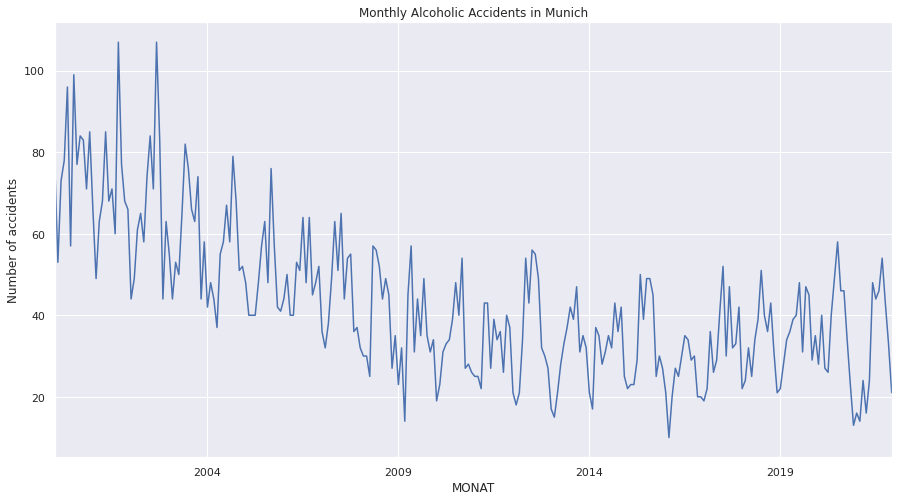

In [18]:
#Creating a yearly graph with all the data points
mun_acc.WERT.plot(figsize=(15,8))
plt.title('Monthly Alcoholic Accidents in Munich')
plt.ylabel('Number of accidents')
plt.show()

The time dependency can be easily noticed. It seems that the time series has also some negative trends over time.

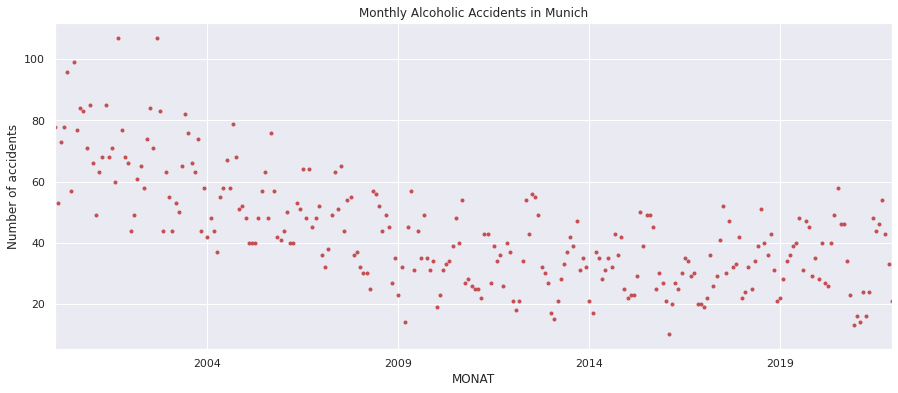

In [19]:
#Creating the same graph with dots
mun_acc.WERT.plot(figsize=(15,6),style = ".r")
plt.title('Monthly Alcoholic Accidents in Munich')
plt.ylabel('Number of accidents')
plt.show()

This scatter plot helps understanding the different amount of accidents in the dataset.

In [20]:
# Create pivot table to view the data by year
mun_acc.index
piv = pd.pivot_table(mun_acc, index=['Month'],columns=['Year'], values=['WERT'])

In [21]:
piv

WERT                                                          ...  \
Year   2000   2001   2002  2003  2004  2005  2006  2007  2008  2009  ...   
Month                                                                ...   
1      78.0   66.0   44.0  55.0  42.0  48.0  44.0  36.0  32.0  23.0  ...   
2      53.0   49.0   49.0  44.0  48.0  40.0  50.0  32.0  30.0  32.0  ...   
3      73.0   63.0   61.0  53.0  44.0  40.0  40.0  38.0  30.0  14.0  ...   
4      78.0   68.0   65.0  50.0  37.0  40.0  40.0  49.0  25.0  45.0  ...   
5      96.0   85.0   58.0  65.0  55.0  48.0  53.0  63.0  57.0  57.0  ...   
6      57.0   68.0   74.0  82.0  58.0  57.0  51.0  51.0  56.0  31.0  ...   
7      99.0   71.0   84.0  76.0  67.0  63.0  64.0  65.0  52.0  44.0  ...   
8      77.0   60.0   71.0  66.0  58.0  48.0  48.0  44.0  44.0  35.0  ...   
9      84.0  107.0  107.0  63.0  79.0  76.0  64.0  54.0  49.0  49.0  ...   
10     83.0   77.0   83.0  74.0  68.0  57.0  45.0  55.0  45.0  35.0  ...   
11     71.0   68.0   44.0  44.0  51.0  42.0  48.0  36.0  27.0  31.0  ...   
12     85.0   66.0   63.0  58.0  52.0  41.0  52.0  37.0  35.0  34.0  ...   

                                                                   
Year   2012  2013  2014  2015  2016  2017  2018  2019  2020  2021  
Month                                                              
1      21.0  17.0  21.0  22.0  21.0  19.0  22.0  22.0  28.0  16.0  
2      18.0  15.0  17.0  23.0  10.0  22.0  24.0  28.0  40.0  14.0  
3      21.0  21.0  37.0  23.0  20.0  36.0  32.0  34.0  27.0  24.0  
4      34.0  28.0  35.0  29.0  27.0  26.0  25.0  36.0  26.0  16.0  
5      54.0  33.0  28.0  50.0  25.0  29.0  34.0  39.0  40.0  24.0  
6      43.0  37.0  31.0  39.0  30.0  41.0  39.0  40.0  49.0  48.0  
7      56.0  42.0  35.0  49.0  35.0  52.0  51.0  48.0  58.0  44.0  
8      55.0  39.0  32.0  49.0  34.0  30.0  40.0  31.0  46.0  46.0  
9      49.0  47.0  43.0  45.0  29.0  47.0  36.0  47.0  46.0  54.0  
10     32.0  31.0  36.0  25.0  30.0  32.0  43.0  45.0  34.0  43.0  
11     30.0  35.0  42.0  30.0  20.0  33.0  31.0  29.0  23.0  33.0  
12     27.0  32.0  25.0  27.0  20.0  42.0  21.0  35.0  13.0  21.0  

[12 rows x 22 columns]

In [22]:
piv.describe()

WERT                                                           \
Year        2000        2001        2002       2003       2004       2005   
count  12.000000   12.000000   12.000000  12.000000  12.000000  12.000000   
mean   77.833333   70.666667   66.916667  60.833333  54.916667  50.000000   
std    13.536707   14.373798   18.411747  12.386454  12.041280  11.281521   
min    53.000000   49.000000   44.000000  44.000000  37.000000  40.000000   
25%    72.500000   65.250000   55.750000  52.250000  47.000000  40.750000   
50%    78.000000   68.000000   64.000000  60.500000  53.500000  48.000000   
75%    84.250000   72.500000   76.250000  68.000000  60.250000  57.000000   
max    99.000000  107.000000  107.000000  82.000000  79.000000  76.000000   

                                                   ...                        \
Year        2006       2007       2008       2009  ...       2012       2013   
count  12.000000  12.000000  12.000000  12.000000  ...  12.000000  12.000000   
mean   49.916667  46.666667  40.166667  35.833333  ...  36.666667  31.416667   
std     7.833011  11.154562  11.652806  11.598067  ...  14.169964   9.802211   
min    40.000000  32.000000  25.000000  14.000000  ...  18.000000  15.000000   
25%    44.750000  36.750000  30.000000  31.000000  ...  25.500000  26.250000   
50%    49.000000  46.500000  39.500000  34.500000  ...  33.000000  32.500000   
75%    52.250000  54.250000  49.750000  44.250000  ...  50.250000  37.500000   
max    64.000000  65.000000  57.000000  57.000000  ...  56.000000  47.000000   

                                                                         \
Year        2014       2015       2016       2017       2018       2019   
count  12.000000  12.000000  12.000000  12.000000  12.000000  12.000000   
mean   31.833333  34.250000  25.083333  34.083333  33.166667  36.166667   
std     7.929615  11.314713   7.178989   9.949494   9.212968   8.032132   
min    17.000000  22.000000  10.000000  19.000000  21.000000  22.000000   
25%    27.250000  24.500000  20.000000  28.250000  24.750000  30.500000   
50%    33.500000  29.500000  26.000000  32.500000  33.000000  35.500000   
75%    36.250000  46.000000  30.000000  41.250000  39.250000  41.250000   
max    43.000000  50.000000  35.000000  52.000000  51.000000  48.000000   

                             
Year        2020       2021  
count  12.000000  12.000000  
mean   35.833333  31.916667  
std    12.904075  14.418790  
min    13.000000  14.000000  
25%    26.750000  19.750000  
50%    37.000000  28.500000  
75%    46.000000  44.500000  
max    58.000000  54.000000  

[8 rows x 22 columns]

Looking at the values we can notice that the number of alcoholic accidents in Munich has a negative trend over time. Although there are some outlier years.

<AxesSubplot:xlabel='Month'>

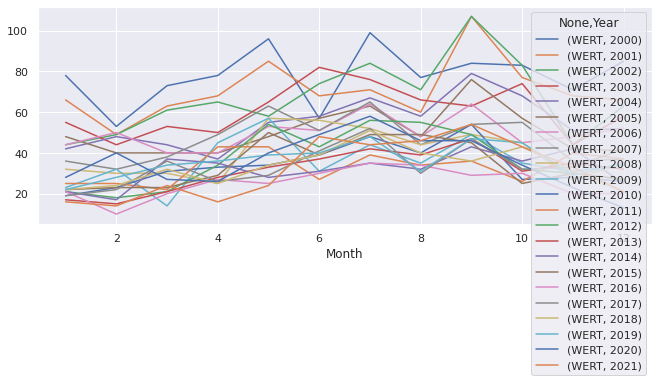

In [23]:
piv.plot()

The seasonal plot shows that there is a monthly seasonality. In fact in some month like September, and October, the value of alcoholic accidents is higher that the other months.

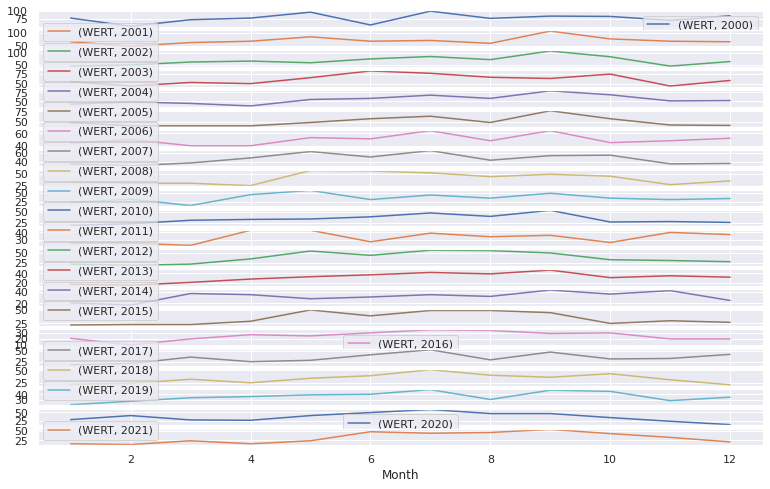

In [24]:
# Plot the yearly groups as subplots
piv.plot(figsize = (13,8), subplots=True, legend=True)
plt.show()

In [25]:
# Create pivot table to view the data by month
piv_month = pd.pivot_table(mun_acc, index=['Year'],columns=['Month'], values=['WERT'])

In [26]:
piv_month.head()

WERT                                                                   
Month    1     2     3     4     5     6     7     8      9     10    11    12
Year                                                                          
2000   78.0  53.0  73.0  78.0  96.0  57.0  99.0  77.0   84.0  83.0  71.0  85.0
2001   66.0  49.0  63.0  68.0  85.0  68.0  71.0  60.0  107.0  77.0  68.0  66.0
2002   44.0  49.0  61.0  65.0  58.0  74.0  84.0  71.0  107.0  83.0  44.0  63.0
2003   55.0  44.0  53.0  50.0  65.0  82.0  76.0  66.0   63.0  74.0  44.0  58.0
2004   42.0  48.0  44.0  37.0  55.0  58.0  67.0  58.0   79.0  68.0  51.0  52.0

In [27]:
piv_month.tail()

WERT                                                                  
Month    1     2     3     4     5     6     7     8     9     10    11    12
Year                                                                         
2017   19.0  22.0  36.0  26.0  29.0  41.0  52.0  30.0  47.0  32.0  33.0  42.0
2018   22.0  24.0  32.0  25.0  34.0  39.0  51.0  40.0  36.0  43.0  31.0  21.0
2019   22.0  28.0  34.0  36.0  39.0  40.0  48.0  31.0  47.0  45.0  29.0  35.0
2020   28.0  40.0  27.0  26.0  40.0  49.0  58.0  46.0  46.0  34.0  23.0  13.0
2021   16.0  14.0  24.0  16.0  24.0  48.0  44.0  46.0  54.0  43.0  33.0  21.0

In [28]:
piv_month.describe()

WERT                                                         \
Month         1          2          3          4          5          6    
count  22.000000  22.000000  22.000000  22.000000  22.000000  22.000000   
mean   32.772727  31.181818  35.636364  38.863636  48.636364  47.636364   
std    17.009610  13.397357  15.385663  15.471311  18.525518  14.506306   
min    16.000000  10.000000  14.000000  16.000000  24.000000  27.000000   
25%    21.000000  22.250000  23.250000  27.250000  34.000000  39.000000   
50%    24.000000  29.000000  33.000000  35.500000  49.000000  45.500000   
75%    43.500000  43.000000  40.000000  44.500000  57.000000  56.750000   
max    78.000000  53.000000  73.000000  78.000000  96.000000  82.000000   

                                                                          
Month         7          8           9          10         11         12  
count  22.000000  22.000000   22.000000  22.000000  22.000000  22.000000  
mean   56.454545  46.681818   57.500000  46.636364  38.000000  38.590909  
std    16.126663  13.145292   21.043606  19.050173  12.921005  17.702997  
min    35.000000  30.000000   29.000000  25.000000  20.000000  13.000000  
25%    45.000000  36.000000   46.250000  32.000000  30.000000  26.250000  
50%    52.000000  45.000000   49.000000  43.000000  34.000000  35.000000  
75%    64.750000  53.500000   63.750000  56.500000  43.500000  49.500000  
max    99.000000  77.000000  107.000000  83.000000  71.000000  85.000000

The monthly seasonality can be easily noticed.

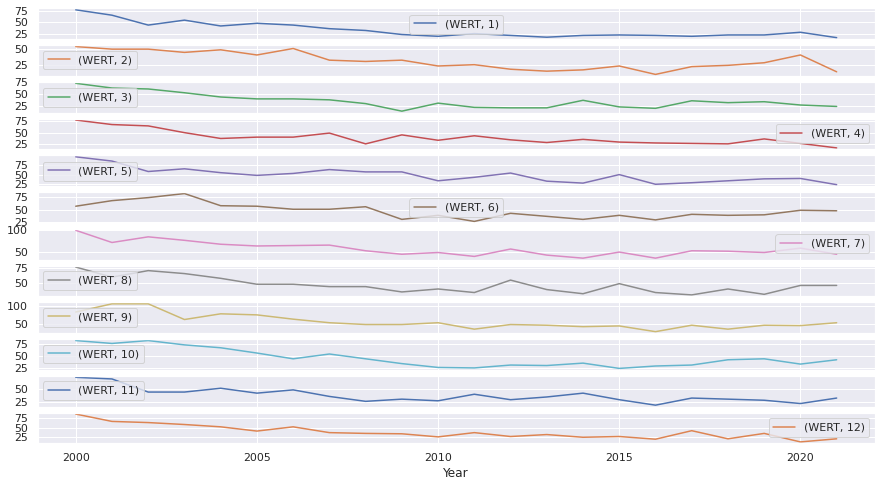

In [29]:
piv_month.plot(figsize = (15,8), subplots=True, legend=True)
plt.show()

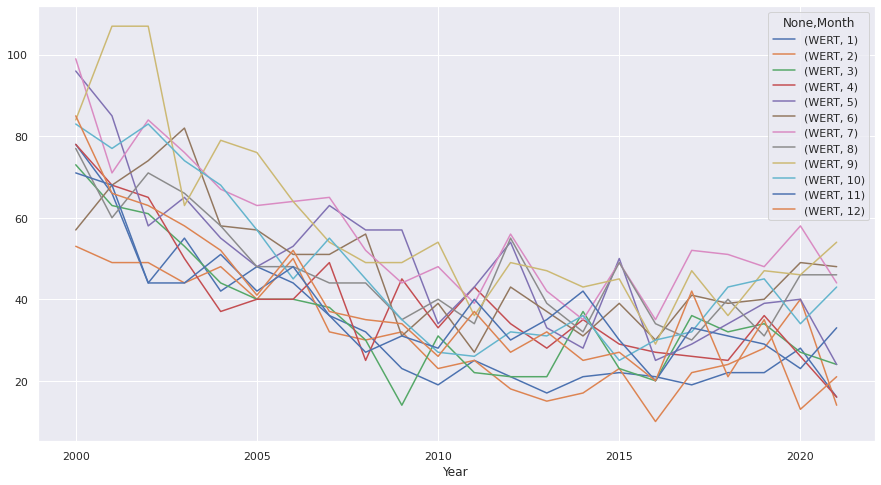

In [30]:
piv_month.plot(figsize = (15,8), subplots=False, legend=True)
plt.show()

The monthly plot shows the negative trend over the years. This trend might be because of the enforced laws over time.

# Check the distribution

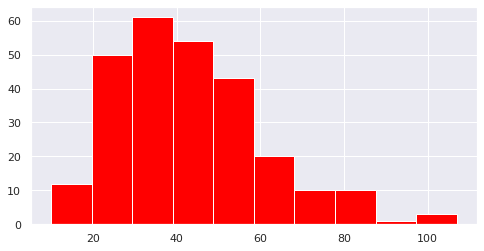

In [31]:
mun_acc.WERT.hist(color = 'red',figsize=(8,4))
plt.show()

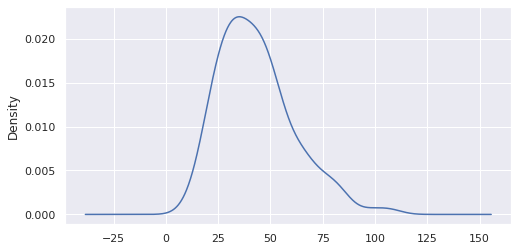

In [32]:
mun_acc.WERT.plot(kind='kde',figsize=(8,4))
plt.show()

The dataset has a slightly skewd distribution

Box plot by year shows the negative trend over years

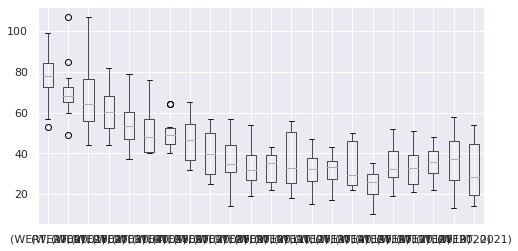

In [33]:
#check the boxplot by year
piv.boxplot(figsize = (8,4))
plt.show()

and box plot by month shows the monthly seasonality:

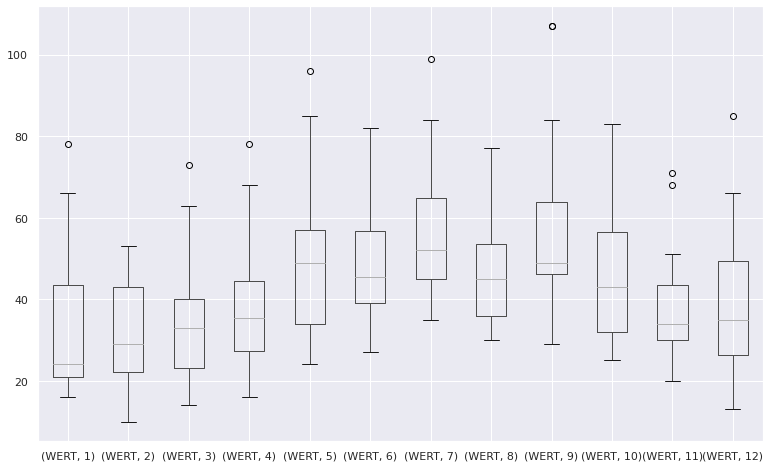

In [34]:
#check the boxplot by month
piv_month.boxplot(figsize = (13,8))
plt.show()

# Fitting Our ARIMA Model

In [35]:
#Checking for trends
rolmean = pd.DataFrame(mun_acc.WERT.rolling(window = 6, center = False).mean())
rolstd = pd.DataFrame(mun_acc.WERT.rolling(window = 6, center = False).std())

In [36]:
rolmean.head(17)

,WERT
MONAT,
2000-01,NaN
2000-02,NaN
2000-03,NaN
2000-04,NaN
2000-05,NaN
2000-06,72.500000
2000-07,76.000000
2000-08,80.000000
2000-09,81.833333


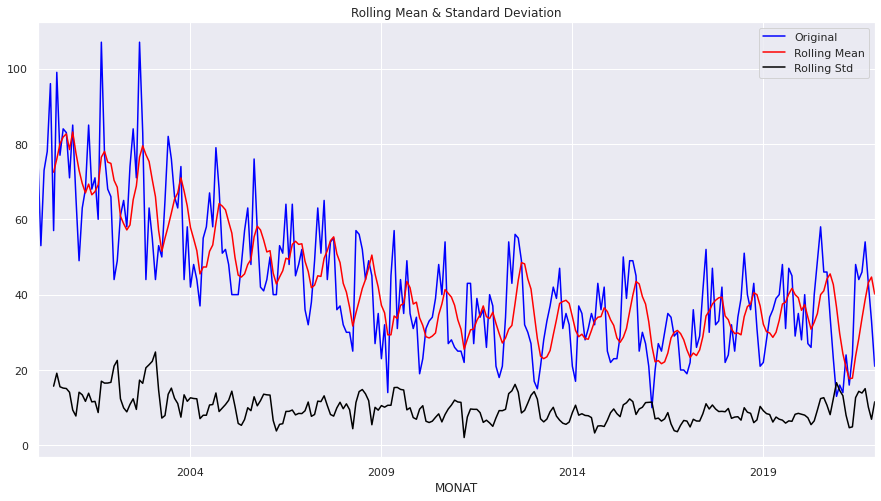

In [37]:
#plotting rolling and data together
fig = plt.figure(figsize=(15,8))
mun_acc.WERT.plot(color='blue',label='Original')
rolmean.WERT.plot(color='red', label='Rolling Mean')
rolstd.WERT.plot(color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [38]:
#perform dickey fuller to see if my data is stationary
from statsmodels.tsa.stattools import adfuller

def check_stationarity(df):
    index =np.array(df.index)
    passe= np.array(df['WERT'])
    ts = pd.Series(passe, index=index)
    dftest = adfuller(ts)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return print(dfoutput)

In [39]:
check_stationarity(mun_acc)

Test Statistic                  -2.675626
p-value                          0.078352
#Lags Used                      13.000000
Number of Observations Used    250.000000
Critical Value (1%)             -3.456781
Critical Value (5%)             -2.873172
Critical Value (10%)            -2.572969
dtype: float64


In [40]:
from statsmodels. tsa. stattools import adfuller
result = adfuller(mun_acc . WERT . dropna( ))
print( 'p-value: ', result[1])

result = adfuller(mun_acc . WERT . diff( ) . dropna() )
print( 'p-value: ', result[1])

result = adfuller(mun_acc . WERT . diff() . diff() . dropna())
print( 'p-value: ', result[1])


p-value:  0.07835181181047786
p-value:  1.332563405188135e-15
p-value:  7.706829333513762e-19


consider d as 1

In [41]:
#Split data into 2 groups: one for training and another for fitting
split_size = len(mun_acc)-24 # round(.8* len(mun_acc)) 
split_size

240

In [42]:
training = mun_acc[:split_size]
test = mun_acc[split_size:]

In [43]:
print(len(training),len(test))

240 24


In [44]:
training.head(12)

,WERT,Year,Month
MONAT,,,
2000-01,78.0,2000,1
2000-02,53.0,2000,2
2000-03,73.0,2000,3
2000-04,78.0,2000,4
2000-05,96.0,2000,5
2000-06,57.0,2000,6
2000-07,99.0,2000,7
2000-08,77.0,2000,8
2000-09,84.0,2000,9


In [45]:
training.tail(12)

,WERT,Year,Month
MONAT,,,
2019-01,22.0,2019,1
2019-02,28.0,2019,2
2019-03,34.0,2019,3
2019-04,36.0,2019,4
2019-05,39.0,2019,5
2019-06,40.0,2019,6
2019-07,48.0,2019,7
2019-08,31.0,2019,8
2019-09,47.0,2019,9


In [46]:
test.head(12)

,WERT,Year,Month
MONAT,,,
2020-01,28.0,2020,1
2020-02,40.0,2020,2
2020-03,27.0,2020,3
2020-04,26.0,2020,4
2020-05,40.0,2020,5
2020-06,49.0,2020,6
2020-07,58.0,2020,7
2020-08,46.0,2020,8
2020-09,46.0,2020,9


In [47]:
test.tail(12)

,WERT,Year,Month
MONAT,,,
2021-01,16.0,2021,1
2021-02,14.0,2021,2
2021-03,24.0,2021,3
2021-04,16.0,2021,4
2021-05,24.0,2021,5
2021-06,48.0,2021,6
2021-07,44.0,2021,7
2021-08,46.0,2021,8
2021-09,54.0,2021,9


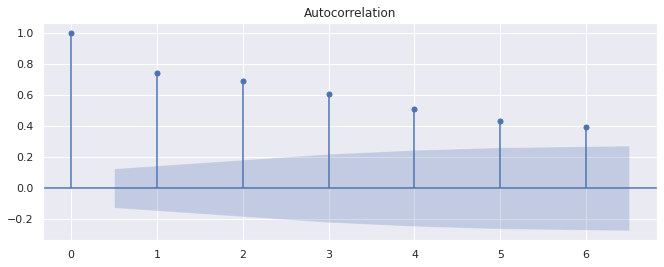

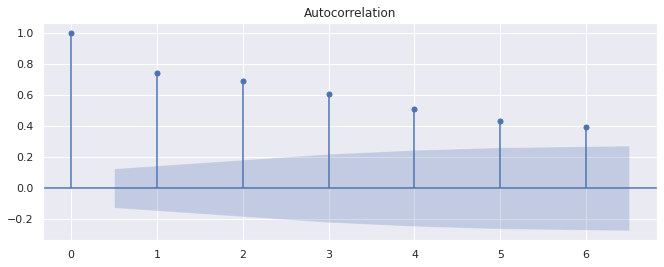

In [48]:

#ACF/PACF to determine which terms in include (MA or AR or Both?)
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
#plot autocorrelation for each lag (alpha is confidence interval)
plot_acf(training.WERT, alpha=.05, lags = 6)

based on the ACF I can try with q=4

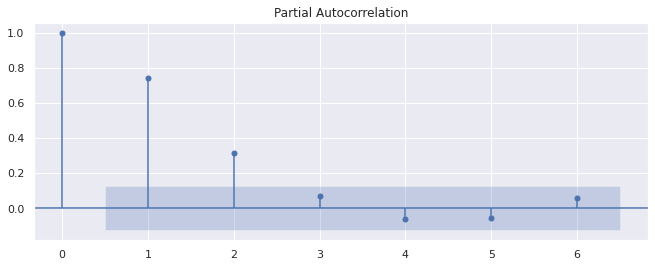

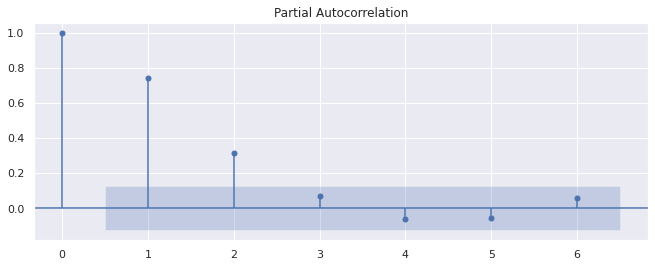

In [49]:
plot_pacf(training.WERT, alpha=.05, lags=6)

In [50]:
#Keep only number of accidents in the data frame
#training.drop(columns =['Month','Year'],axis=1, inplace = True)
#test.drop(columns =['Month','Year'],axis=1, inplace = True)

# Grid Search

A grid search can be performed to find the optimal value of hyperparameters.

In [51]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(train, test, arima_order):
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [52]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(traindata, testdata, p_values, q_values):
    traindata = traindata.astype('float32')
    testdata = testdata.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for q in q_values:
            order = (p,0,q)
            try:
                rmse = evaluate_arima_model(traindata, testdata, order)
                if rmse < best_score:
                    best_score, best_cfg = rmse, order
                print('ARIMA%s RMSE=%.3f' % (order,rmse))
            except:
                continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [53]:
# evaluate parameters
#p_values = [1,2]
#q_values = range(1,4)
p_values = [0, 1, 2, 4, 6, 8, 10]
q_values = range(0, 6)
warnings.filterwarnings("ignore")
evaluate_models(training.WERT, test.WERT, p_values, q_values)

ARIMA(0, 0, 0) RMSE=16.508
ARIMA(0, 0, 1) RMSE=12.438
ARIMA(0, 0, 2) RMSE=10.906
ARIMA(0, 0, 3) RMSE=10.856
ARIMA(0, 0, 4) RMSE=10.257
ARIMA(0, 0, 5) RMSE=10.154
ARIMA(1, 0, 0) RMSE=9.966
ARIMA(1, 0, 1) RMSE=10.958
ARIMA(1, 0, 2) RMSE=12.751
ARIMA(1, 0, 3) RMSE=10.947
ARIMA(1, 0, 4) RMSE=10.553
ARIMA(1, 0, 5) RMSE=9.670
ARIMA(2, 0, 0) RMSE=10.696
ARIMA(2, 0, 1) RMSE=10.862
ARIMA(2, 0, 2) RMSE=10.937
ARIMA(2, 0, 3) RMSE=10.446
ARIMA(2, 0, 4) RMSE=10.778
ARIMA(2, 0, 5) RMSE=10.606
ARIMA(4, 0, 0) RMSE=10.808
ARIMA(4, 0, 1) RMSE=10.859
ARIMA(4, 0, 4) RMSE=8.868
ARIMA(6, 0, 0) RMSE=10.853
ARIMA(6, 0, 1) RMSE=9.535
ARIMA(6, 0, 2) RMSE=9.886
ARIMA(6, 0, 3) RMSE=9.592
ARIMA(6, 0, 4) RMSE=9.833
ARIMA(6, 0, 5) RMSE=9.051
ARIMA(8, 0, 0) RMSE=9.504
ARIMA(8, 0, 1) RMSE=8.911
ARIMA(8, 0, 2) RMSE=8.704
ARIMA(8, 0, 4) RMSE=8.930
ARIMA(10, 0, 0) RMSE=9.599
ARIMA(10, 0, 1) RMSE=9.263
ARIMA(10, 0, 2) RMSE=8.915
Best ARIMA(8, 0, 2) RMSE=8.704


Best 8.0.2

# Defining the AI model

In [54]:
# Try ARIMA model with the training data
# fit ARIMA model
model = ARIMA(training.WERT, order=((8, 0, 2)))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                   WERT   No. Observations:                  240
Model:                     ARMA(8, 2)   Log Likelihood                -888.307
Method:                       css-mle   S.D. of innovations              9.661
Date:                Sun, 19 Jun 2022   AIC                           1800.613
Time:                        08:00:42   BIC                           1842.381
Sample:                    01-31-2000   HQIC                          1817.443
                         - 12-31-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         53.5740     17.150      3.124      0.002      19.960      87.188
ar.L1.WERT     0.1423      0.000    819.997      0.000       0.142       0.143
ar.L2.WERT     1.0355        nan        nan        n

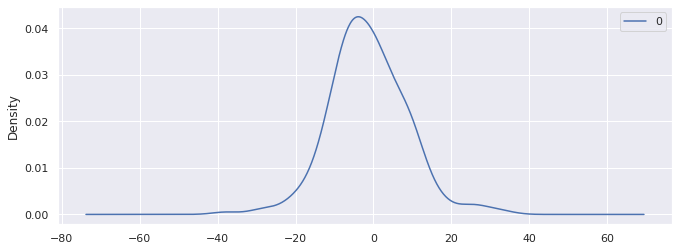

In [55]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(kind='kde')
plt.show()

In [56]:
#make a prediction for the training data
ins_predict = model_fit.predict()
ins_predict

MONAT
2000-01    53.574049
2000-02    73.795222
2000-03    61.566503
2000-04    65.942059
2000-05    71.043726
             ...    
2019-08    37.671589
2019-09    36.204556
2019-10    34.429999
2019-11    37.395867
2019-12    31.283805
Freq: M, Length: 240, dtype: float64

In [57]:
model_fit.forecast(len(test), alpha=0.05) # 95% conf

(array([34.10874749, 32.13771129, 33.95489593, 31.87335543, 41.08866749,
        36.20143386, 40.68680693, 38.11386834, 40.4394501 , 36.51298979,
        37.25172274, 34.27979662, 36.64385196, 33.51809269, 37.23798259,
        35.04086219, 39.10729939, 36.53037943, 39.86816588, 36.9007536 ,
        39.43178817, 35.93690264, 38.37318764, 35.08767082]),
 array([ 9.66098384, 10.13167336, 10.42889935, 10.83976164, 10.88504587,
        10.88558118, 11.14328485, 11.15726021, 11.15728228, 11.15842883,
        11.27302809, 11.50259944, 11.88625683, 12.13725591, 12.30694689,
        12.41021325, 12.43277226, 12.43580553, 12.43588326, 12.43796552,
        12.45091708, 12.48704099, 12.57252367, 12.69256647]),
 array([[15.17356711, 53.04392787],
        [12.2799964 , 51.99542619],
        [13.51462881, 54.39516306],
        [10.62781302, 53.11889784],
        [19.75436961, 62.42296537],
        [14.86608679, 57.53678093],
        [18.84636994, 62.52724391],
        [16.24604017, 59.98169651],
    

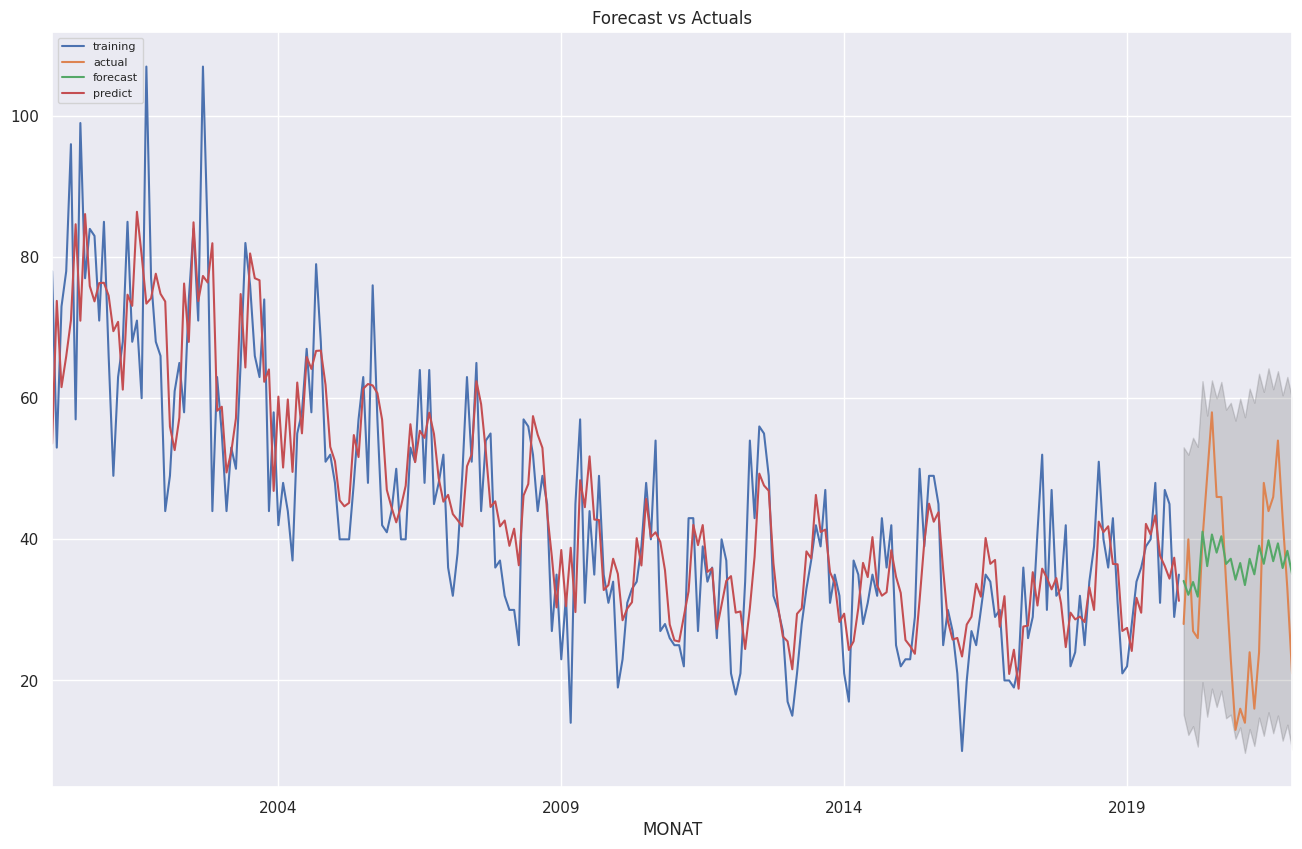

In [58]:
#Out-of-sample validation of an ARIMA model

# Forecast
fc, se, conf = model_fit.forecast(len(test), alpha=0.05) # 95% conf
    # Make as pandas series
fc_series = pd.Series(fc, index=test.index)
pd_series = ins_predict
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)
    # Plot
plt.figure(figsize=(16,10), dpi=100)
training.WERT.plot(label='training')
test.WERT.plot(label='actual')
plt.plot(fc_series, label='forecast')
plt.plot(pd_series, label='predict')
plt.fill_between(lower_series.index, lower_series, upper_series,
color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

The actual and forcasted values for January 2020 are:

In [59]:
print ("Actual:", test.WERT[0],"Forcast:", fc_series[0])

Actual: 28.0 Forcast: 34.10874749056092


# Defining the final AI Model

In [60]:
# fit model
final_model = ARIMA(mun_acc.WERT, order=(8,0,2))
final_fit = final_model.fit(disp = 0)

We define the alcoholic accidents by 01-2022 as Januar 2022:

In [61]:
# Save the model
pickle.dump(final_fit, open('model.pkl','wb'))

In [62]:
# one-step out-of sample forecast
Januar2022 = final_fit.forecast()[0]
print('Total amount of forecasted alcoholic accidents by 01/2022 is:', Januar2022)

Total amount of forecasted alcoholic accidents by 01/2022 is: [23.80261211]


In [63]:
start_year = '2000'
start_month = '1'

end_year = '2022'
end_month = '6'
#id = int(year-start_year)*12+int()

start_index = pd.to_datetime(start_year + start_month, format="%Y%m").to_period('M')
end_index = pd.to_datetime(end_year + end_month, format="%Y%m").to_period('M')

prediction = final_fit.predict(start = start_index, end = end_index)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(prediction)

2000-01    51.899672
2000-02    74.116425
2000-03    60.793033
2000-04    65.888736
2000-05    71.670613
2000-06    86.107558
2000-07    70.146571
2000-08    87.198025
2000-09    76.215338
2000-10    73.946121
2000-11    76.255026
2000-12    76.510672
2001-01    74.326985
2001-02    69.448472
2001-03    69.709250
2001-04    60.938007
2001-05    74.686126
2001-06    73.585780
2001-07    86.452686
2001-08    80.481204
2001-09    73.238714
2001-10    75.309788
2001-11    77.945904
2001-12    74.485956
2002-01    73.398316
2002-02    55.480985
2002-03    51.603910
2002-04    57.283488
2002-05    76.325790
2002-06    68.013038
2002-07    85.369120
2002-08    74.756064
2002-09    77.578529
2002-10    77.459910
2002-11    82.587930
2002-12    57.212575
2003-01    58.120247
2003-02    49.328980
2003-03    51.271802
2003-04    56.699564
2003-05    74.698680
2003-06    64.583860
2003-07    81.327688
2003-08    77.757995
2003-09    76.827351
2003-10    62.441146
2003-11    64.333266
2003-12    46

In [64]:
start_year = '2000'
start_month = '1'

end_year = '2015'
end_month = '6'
id = (int(end_year)-int(start_year))*12+(int(end_month)-int(start_month))

start_index = pd.to_datetime(start_year + start_month, format="%Y%m").to_period('M')
end_index = pd.to_datetime(end_year + end_month, format="%Y%m").to_period('M')

prediction = int(final_fit.predict(start = start_index, end = end_index)[id])

prediction

40